In [1]:
import pandas as pd
import os
import json
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from PIL import Image

In [2]:
image_directory = "/home/merouane/Gitlab/Ecole_IA/projet-4-groupe-4/data/image_masque/Medical mask/Medical mask/Medical Mask/images"

directory = "/home/merouane/Gitlab/Ecole_IA/projet-4-groupe-4/data/image_masque/Medical mask/Medical mask/Medical Mask/annotations"

In [3]:
df = pd.read_csv("/home/merouane/Gitlab/Ecole_IA/projet-4-groupe-4/data/image_masque/train.csv")

In [3]:
def getJSON(filePathandName):
    with open(filePathandName,'r') as f:
        return json.load(f)

In [5]:
jsonfiles = []
for i in os.listdir(directory):
    jsonfiles.append(getJSON(os.path.join(directory, i)))

In [6]:
data = []
img_size = 124
mask = ['face_with_mask']
non_mask = ['face_no_mask']
labels={'mask': 0, 'without mask': 1}
for i in df['name'].unique():
    f = i + '.json'
    for j in getJSON(os.path.join(directory, f)).get("Annotations"):
        if j['classname'] in mask:
            x, y, w, h = j['BoundingBox']
            img = cv2.imread(os.path.join(image_directory, i), 1)
            img = img[y:h, x:w]
            img = cv2.resize(img, (img_size, img_size))
            data.append([img, labels['mask']])
        if j['classname'] in non_mask:
            x, y, w, h = j['BoundingBox']
            img = cv2.imread(os.path.join(image_directory, i), 1)
            img = img[y:h, x:w]
            img = cv2.resize(img, (img_size, img_size))
            data.append([img, labels['without mask']])
            random.shuffle(data)

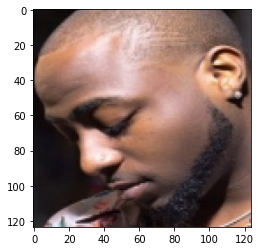

In [7]:
plt.imshow(cv2.cvtColor(data[0][0], cv2.COLOR_BGR2RGB))

In [8]:
X = []
Y = []
for features, label in data:
    X.append(features)
    Y.append(label)

In [9]:
X = np.array(X)
X = X.reshape(-1,124, 124, 3)
Y = np.array(Y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.33, stratify=Y)

In [11]:
X_train = X_train.reshape(3851, 46128)

In [12]:
X_test = X_test.reshape(1898, 46128)

In [13]:
n_components = 200
clf_eigen = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_components)),
        ("classifier", LogisticRegression(random_state=0, max_iter=10000)),
    ]
)

In [14]:
clf_eigen.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=200)),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=0))])

In [15]:
eigen_y_pred = clf_eigen.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1380
           1       0.72      0.68      0.70       518

    accuracy                           0.84      1898
   macro avg       0.80      0.79      0.80      1898
weighted avg       0.84      0.84      0.84      1898



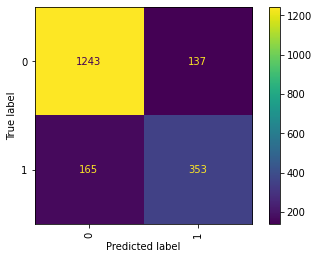

In [16]:
_ = ConfusionMatrixDisplay.from_predictions(
    y_test,
    eigen_y_pred,
    xticks_rotation="vertical",
)

print(classification_report(y_test, eigen_y_pred))

In [ ]:
clf_eigen.score(X_test, y_test)

In [ ]:
X_train2 = X_train.reshape(-1,124, 124, 3)

In [ ]:
plt.imshow(cv2.cvtColor(X_train2[0], cv2.COLOR_BGR2RGB))

In [ ]:
eigenfaces = clf_eigen["pca"].components_.reshape((n_components, 124, 124, 3))

In [129]:
img = Image.open('/home/merouane/Gitlab/Ecole_IA/projet-4-groupe-4/data/image_masque/Medical mask/Medical mask/Medical Mask/images/0046.jpg')

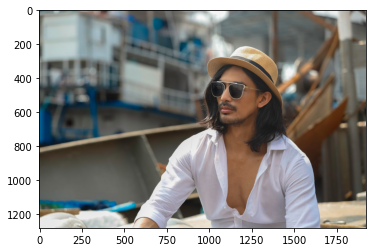

In [141]:
img_data = np.array(img)
plt.imshow(img_data)

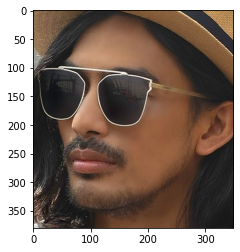

In [142]:
img_data = img_data[320:700, 1000:1350]
plt.imshow(img_data)

In [121]:
img_data.shape

(390, 350, 3)

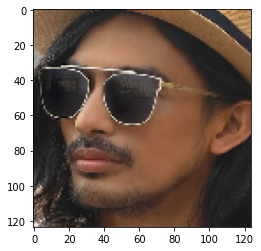

In [143]:
img_data = cv2.resize(img_data, (img_size, img_size))
plt.imshow(img_data)

In [144]:
img_data = img_data.reshape(46128)

In [145]:
clf_eigen.predict([img_data])

array([0])